<h1>PM2.5 Prediction</h1>
<p style="font-size: 30px;">This project is trying to predict concentration of PM2.5 base on gases molecule in the air and components of weather.

<p>datasets:</p>
<p><a>https://openweathermap.org/</a></p>
<p><a>https://open-meteo.com/</a></p>


<h2>Fields</h2>
<table>
    <tr>
        <td>Features</td>
        <td>Definition</td>
    </tr>
    <tr>
        <td>datetime</td>
        <td>Date and time</td>
    </tr>
    <tr>
        <td>pm2.5</td>
        <td> Сoncentration of PM2.5 (Fine particles matter), μg/m3</td>
    </tr>
    <tr>
        <td>pm10</td>
        <td>ССoncentration of PM10 (Coarse particulate matter), μg/m3</td>
    </tr>
    <tr>
        <td>co</td>
        <td>Сoncentration of CO (Carbon monoxide), μg/m3</td>
    </tr>
    <tr>
        <td>no</td>
        <td>Сoncentration of NO (Nitrogen monoxide), μg/m3</td>
    </tr>
    <tr>
        <td>no2</td>
        <td>Сoncentration of NO2 (Nitrogen dioxide), μg/m3</td>
    </tr>
    <tr>
        <td>o3</td>
        <td>Сoncentration of O3 (Ozone), μg/m3</td>
    </tr>
    <tr>
        <td>so2</td>
        <td>Сoncentration of SO2 (Sulphur dioxide), μg/m3</td>
    </tr>
    <tr>
        <td>nh3</td>
        <td>Сoncentration of NH3 (Ammonia), μg/m3</td>
    </tr>
    <tr>
        <td>temp</td>
        <td>Air temperature at 2 meters above ground</td>
    </tr>
    <tr>
        <td>humidity</td>
        <td>Relative humidity at 2 meters above ground</td>
    </tr>
    <tr>
        <td>rain</td>
        <td>Only liquid precipitation of the preceding hour including local showers and rain from large scale systems</td>
    </tr>
    <tr>
        <td>wind_speed</td>
        <td>Wind speed at 10 above ground</td>
    </tr>
    <tr>
        <td>wind_dir</td>
        <td>Wind direction at 10 meters above ground</td>
    </tr>
    

</table>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

<h2>1. Data Exploration</h2>

In [50]:
df = pd.read_csv('bangkok_pm25_complete.csv')
df.head()

,datetime,pm2.5,pm10,co,no,no2,o3,so2,nh3,temp,humidity,rain,wind_speed,wind_dir
0,2023-01-01 07:00:00,158.36,213.74,4432.68,109.08,47.98,0.00,40.53,25.59,18.50,88.987240,0.0,4.896529,342.897200
1,2023-01-01 08:00:00,199.19,266.55,7797.24,205.64,58.95,0.41,53.88,32.42,20.25,77.309105,0.0,3.671294,11.309895
2,2023-01-01 09:00:00,226.01,304.46,10467.53,271.80,71.97,2.46,59.13,37.49,22.05,68.127700,0.0,4.452954,75.963730
3,2023-01-01 10:00:00,235.79,321.65,10360.72,223.52,119.27,10.46,59.60,41.04,23.55,62.805393,0.0,3.545589,66.037506
4,2023-01-01 11:00:00,187.84,264.48,3257.75,15.65,100.08,161.65,72.48,45.09,25.05,57.772736,0.0,3.563818,44.999897


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26753 entries, 0 to 26752
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    26753 non-null  object 
 1   pm2.5       26753 non-null  float64
 2   pm10        26753 non-null  float64
 3   co          26753 non-null  float64
 4   no          26753 non-null  float64
 5   no2         26753 non-null  float64
 6   o3          26753 non-null  float64
 7   so2         26753 non-null  float64
 8   nh3         26753 non-null  float64
 9   temp        26753 non-null  float64
 10  humidity    26753 non-null  float64
 11  rain        26753 non-null  float64
 12  wind_speed  26753 non-null  float64
 13  wind_dir    26753 non-null  float64
dtypes: float64(13), object(1)
memory usage: 2.9+ MB


In [52]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [53]:
df.describe()

,datetime,pm2.5,pm10,co,no,no2,o3,so2,nh3,temp,humidity,rain,wind_speed,wind_dir
count,26753,26753.000000,26753.000000,26753.000000,26753.000000,26753.000000,26753.000000,26753.000000,26753.000000,26753.000000,26753.000000,26753.000000,26753.000000,26753.000000
mean,2024-07-23 04:50:54.476133376,82.944774,121.122415,2676.847307,53.457698,45.853017,38.507765,47.082947,26.523022,28.372042,72.763639,0.185729,8.071103,178.451188
min,2023-01-01 07:00:00,0.000000,-9999.000000,62.930000,0.000000,-9999.000000,-9999.000000,0.070000,0.060000,17.050000,21.285742,0.000000,0.000000,0.954824
25%,2023-10-13 23:00:00,26.660000,45.320000,636.050000,0.100000,6.770000,0.000000,8.470000,4.150000,26.250000,61.525043,0.000000,5.091168,94.315950
50%,2024-07-21 15:00:00,53.970000,87.950000,1762.390000,20.340000,40.100000,4.290000,45.300000,25.840000,28.100000,76.048620,0.000000,7.570707,187.431320
75%,2025-05-08 07:00:00,101.180000,154.170000,3337.860000,72.420000,60.320000,41.260000,66.760000,37.490000,30.500000,86.699425,0.000000,10.483357,239.036320
max,2026-02-12 23:00:00,1976.500000,2188.960000,29052.730000,886.920000,685.450000,755.310000,370.030000,263.450000,39.350000,100.000000,21.800000,25.982424,360.000000
std,NaN,111.138745,152.066337,3137.837986,83.296343,99.361033,93.808389,39.744393,22.256755,3.056438,16.885091,0.853978,4.090444,95.213321


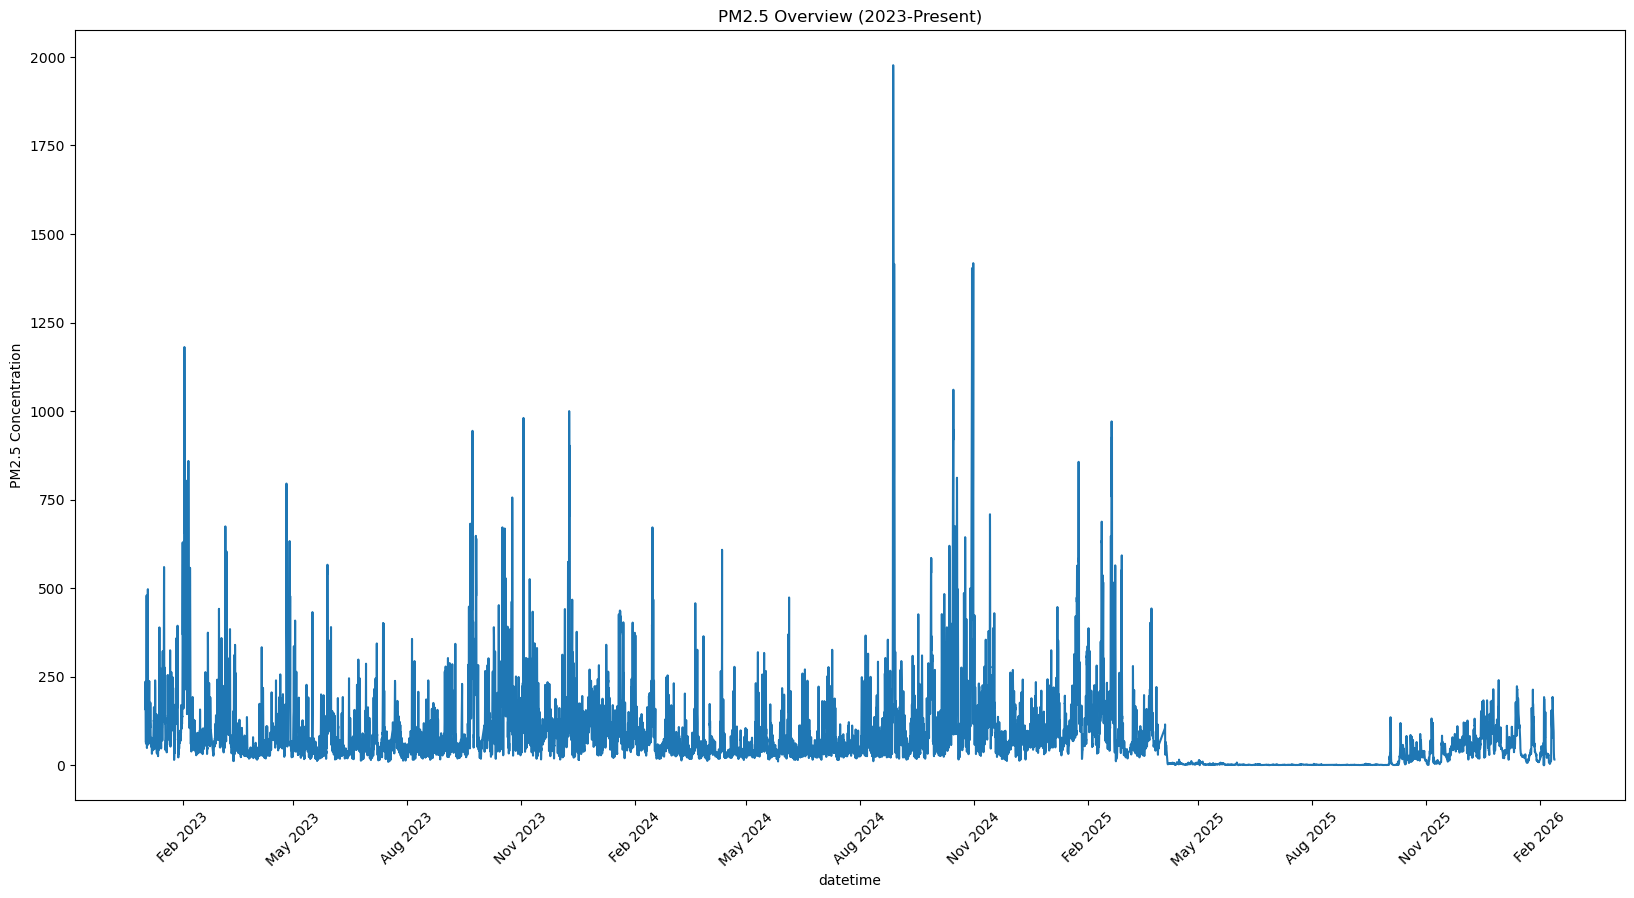

In [54]:
import matplotlib.dates as mdates

plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='datetime', y='pm2.5')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.title('PM2.5 Overview (2023-Present)')
plt.ylabel('PM2.5 Concentration')
plt.show()

<p style="font-size:20px;">From the graph, it looks like PM2.5 concentration peaks from September to February, which is winter in Thailand. Then, it drops in summer (March to April) and continues to decrease in the rainy season (June to September).</p>

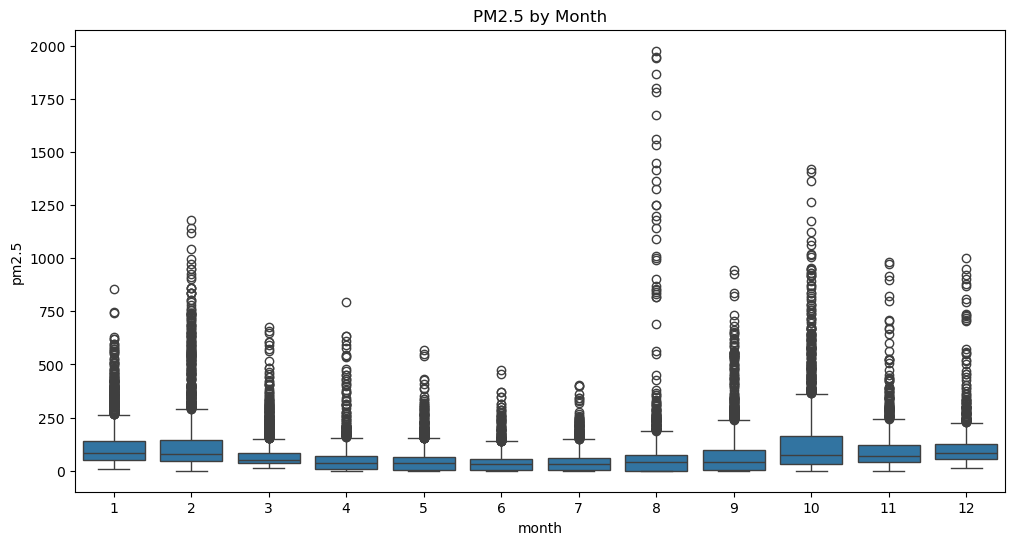

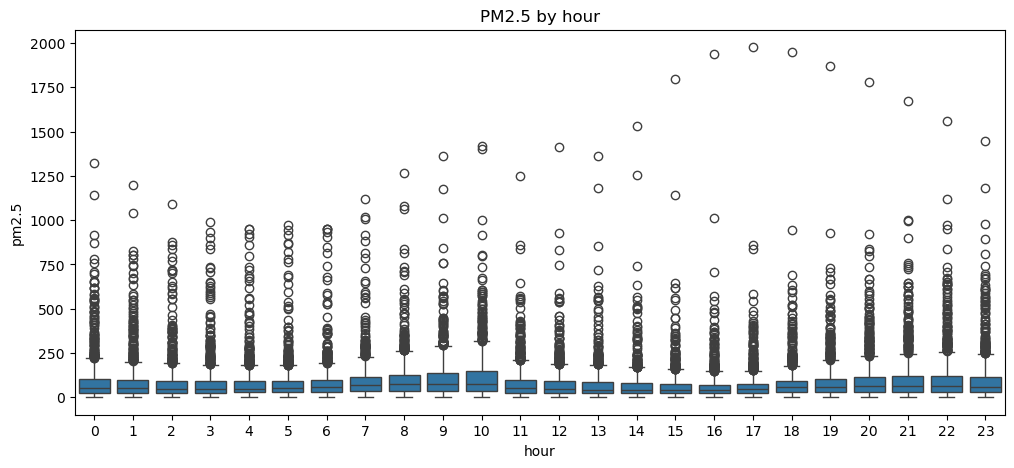

In [55]:
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='pm2.5')
plt.title('PM2.5 by Month')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='hour', y='pm2.5')
plt.title('PM2.5 by hour')
plt.show()


<p style="font-size:20px;">The first graph shows that PM2.5 concentrations are high, starting from August through February, while levels are low from March to July.</p>
<p style="font-size:20px;">The second graph show that PM2.5 is peak around 8:00 AM to 10 AM, which coincides with the morning commute. Another peak is around 18:00 to midnight, likely due to evening traffic and people returning home.</p>

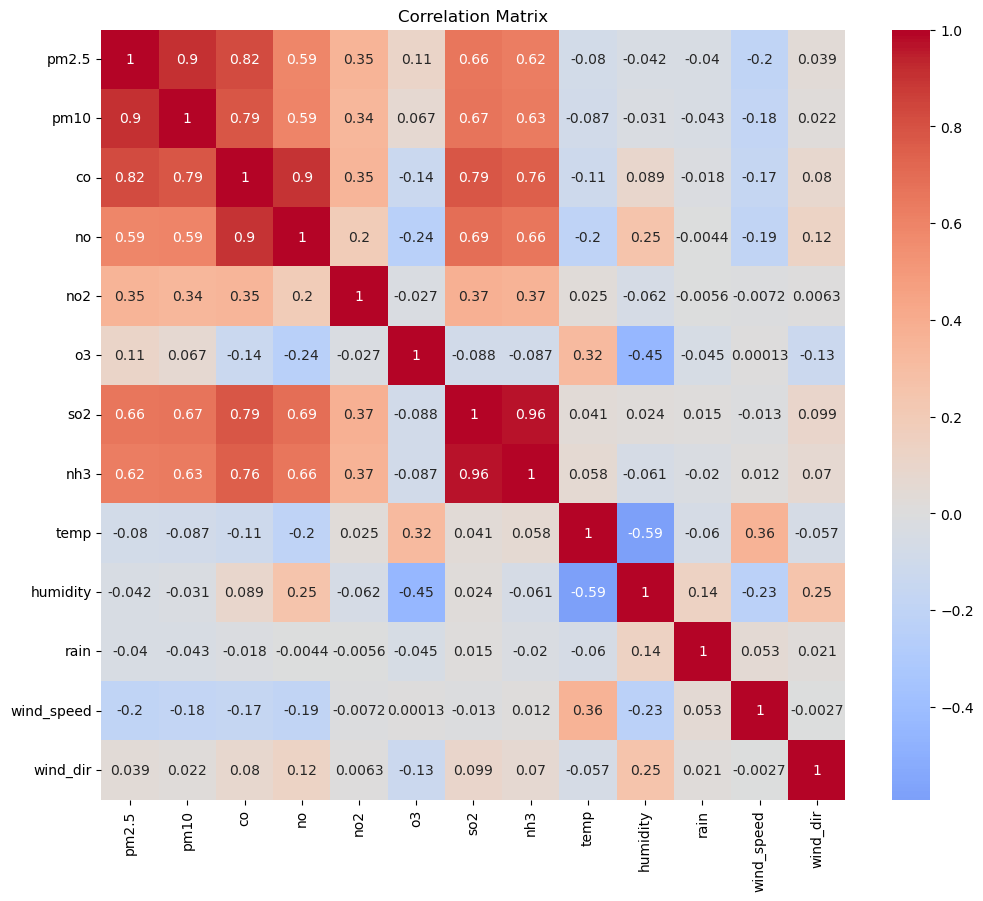

In [56]:
selected_col = [col for col in df.columns if col not in ['month', 'hour', 'datetime']]
corr = df[selected_col].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


<p style="font-size:20px;">The correlation matrix shows that PM2.5 has a strong positive correlation with PM10, CO, NO, SO2, and NH3. Conversely, it shows a negative correlation with wind speed.</p>

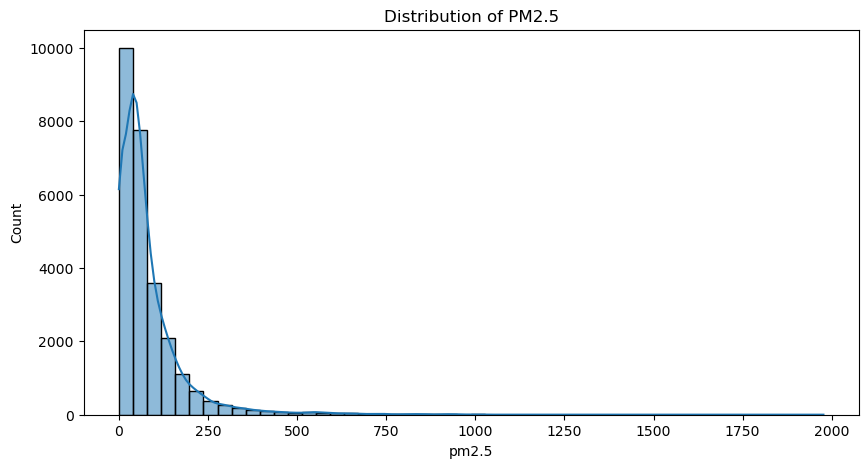

In [57]:
plt.figure(figsize=(10, 5))
sns.histplot(df['pm2.5'], kde=True, bins=50)
plt.title('Distribution of PM2.5')
plt.show()

<p style="font-size:20px;">PM2.5 has a Right-Skewed distribution.</p>

<h2>2. Data Cleaning</h2>

In [58]:
df.isnull().sum()

datetime      0
pm2.5         0
pm10          0
co            0
no            0
no2           0
o3            0
so2           0
nh3           0
temp          0
humidity      0
rain          0
wind_speed    0
wind_dir      0
month         0
hour          0
dtype: int64

In [59]:
cols_to_fix = []
columns = [col for col in df.columns if col not in ['month', 'hour', 'datetime', 'rain', 'wind_speed']]
for col in columns:
    zero_sum = (df[col] <= 0).sum()
    if(zero_sum > 0):
        cols_to_fix.append(col)
        print(f'{col}: {zero_sum}')

print(f'columns to fix: {cols_to_fix}')

pm2.5: 5
pm10: 6
no: 2951
no2: 2
o3: 7570
columns to fix: ['pm2.5', 'pm10', 'no', 'no2', 'o3']


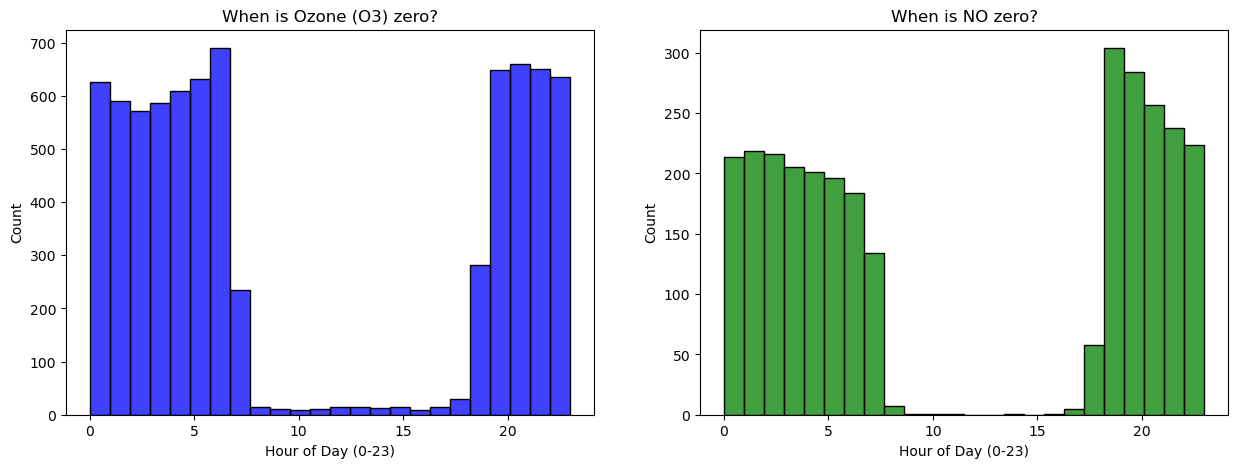

In [60]:
o3_zeros = df[df['o3'] == 0]

no_zeros = df[df['no'] == 0]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(o3_zeros['datetime'].dt.hour, bins=24, ax=ax[0], color='blue')
ax[0].set_title('When is Ozone (O3) zero?')
ax[0].set_xlabel('Hour of Day (0-23)')

sns.histplot(no_zeros['datetime'].dt.hour, bins=24, ax=ax[1], color='green')
ax[1].set_title('When is NO zero?')
ax[1].set_xlabel('Hour of Day (0-23)')

plt.show()

<p style="font-size:20px;">The graphs show that Ozone (O3) and Nitric Oxide (NO) concentrations frequently drop to zero during the night. This is expected behavior:</p>
<p style="font-size:20px;">Ozone: Formation requires sunlight (photochemical reaction), and it is consumed by other gases at night (titration).</p>
<p style="font-size:20px;">Ozone: Formation requires sunlight (photochemical reaction), and it is consumed by other gases at night (titration).</p>


In [61]:
cols_to_fix.remove('o3')
cols_to_fix.remove('no')

df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
df = df.replace(-9999, np.nan)

In [62]:
from sklearn.impute import KNNImputer

datetime_col = df['datetime']
df_numeric = df.drop(columns=['datetime'])

imputer = KNNImputer(n_neighbors=5).set_output(transform="pandas")
df_imputed_numeric = imputer.fit_transform(df_numeric)

df_imputed = df_imputed_numeric.copy()
df_imputed['datetime'] = datetime_col

df_imputed.head()

,pm2.5,pm10,co,no,no2,o3,so2,nh3,temp,humidity,rain,wind_speed,wind_dir,month,hour,datetime
0,158.36,213.74,4432.68,109.08,47.98,0.00,40.53,25.59,18.50,88.987240,0.0,4.896529,342.897200,1.0,7.0,2023-01-01 07:00:00
1,199.19,266.55,7797.24,205.64,58.95,0.41,53.88,32.42,20.25,77.309105,0.0,3.671294,11.309895,1.0,8.0,2023-01-01 08:00:00
2,226.01,304.46,10467.53,271.80,71.97,2.46,59.13,37.49,22.05,68.127700,0.0,4.452954,75.963730,1.0,9.0,2023-01-01 09:00:00
3,235.79,321.65,10360.72,223.52,119.27,10.46,59.60,41.04,23.55,62.805393,0.0,3.545589,66.037506,1.0,10.0,2023-01-01 10:00:00
4,187.84,264.48,3257.75,15.65,100.08,161.65,72.48,45.09,25.05,57.772736,0.0,3.563818,44.999897,1.0,11.0,2023-01-01 11:00:00


In [63]:
print(f'final checked: {df_imputed.isnull().sum()}')

final checked: pm2.5         0
pm10          0
co            0
no            0
no2           0
o3            0
so2           0
nh3           0
temp          0
humidity      0
rain          0
wind_speed    0
wind_dir      0
month         0
hour          0
datetime      0
dtype: int64


<h2>3. Feature Engineering</h2>

<h2>4. Splitting Data</h2>

<h2>5. Modeling</h2>

<h2>6. Evaluation</h2>